In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
file_path_train = r'C:\\Users\\mshus\\Google Drive\\Data Science - Springboard\\Git_GitHub\\Springboard\\Capstone Project Two\\Data\train_data.csv'
file_path_test = r'C:\\Users\\mshus\\Google Drive\\Data Science - Springboard\\Git_GitHub\\Springboard\\Capstone Project Two\\Data\test_data.csv'

In [3]:
train_data = pd.read_csv(file_path_train, index_col = ['Date'])
test_data = pd.read_csv(file_path_test, index_col = ['Date'])

In [4]:
train_data.head()

,confirmed,High,Volume,adjusted_close,first_diff_adj_stock
Date,,,,,
2020-01-23,1,57.980000,227900.0,54.500458,-0.386795
2020-01-24,2,57.799999,146200.0,53.924980,-0.575478
2020-01-27,5,55.689999,230600.0,52.151379,-1.773602
2020-01-28,5,56.090000,174400.0,52.358929,0.207550
2020-01-29,5,55.900002,214500.0,52.104210,-0.254719


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 102 entries, 2020-01-23 to 2020-06-17
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   confirmed             102 non-null    int64  
 1   High                  102 non-null    float64
 2   Volume                102 non-null    float64
 3   adjusted_close        102 non-null    float64
 4   first_diff_adj_stock  102 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 4.8+ KB


In [6]:
train_data.index

Index(['2020-01-23', '2020-01-24', '2020-01-27', '2020-01-28', '2020-01-29',
       '2020-01-30', '2020-01-31', '2020-02-03', '2020-02-04', '2020-02-05',
       ...
       '2020-06-04', '2020-06-05', '2020-06-08', '2020-06-09', '2020-06-10',
       '2020-06-11', '2020-06-12', '2020-06-15', '2020-06-16', '2020-06-17'],
      dtype='object', name='Date', length=102)

In [7]:
train_data.index = pd.DatetimeIndex(train_data.index).to_period('B').dropna()

In [8]:
train_data.index

PeriodIndex(['2020-01-23', '2020-01-24', '2020-01-27', '2020-01-28',
             '2020-01-29', '2020-01-30', '2020-01-31', '2020-02-03',
             '2020-02-04', '2020-02-05',
             ...
             '2020-06-04', '2020-06-05', '2020-06-08', '2020-06-09',
             '2020-06-10', '2020-06-11', '2020-06-12', '2020-06-15',
             '2020-06-16', '2020-06-17'],
            dtype='period[B]', name='Date', length=102, freq='B')

# AR Model 

### Optimal Lag Selection 

In [9]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

<Figure size 864x576 with 0 Axes>

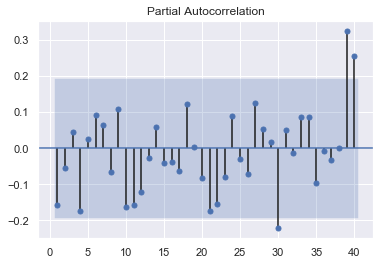

In [10]:
# PACF of differenced data

plt.figure(figsize = (12, 8))
plot_pacf(train_data.first_diff_adj_stock, lags = 40, zero = False, method = ('ols'))
plt.show()

# Fiting the AR Model

In [11]:
from statsmodels.tsa.arima_model import ARMA

### Check the Model Performance

In [12]:
from scipy.stats.distributions import chi2 

# define function to compare the likelihood ratio

def LLR_test(model1, model2, DF = 1):
    L1 = model1.llf
    L2 = model2.llf
    LR = 2 *(L2 - L1)
    p = chi2.sf(LR, DF).round(3)
    
    return p 

In [13]:
# AR ORDER 1
ar1_model = ARMA(train_data.adjusted_close, order = (1, 0))
result_ar1 = ar1_model.fit()
print(result_ar1.summary())

                              ARMA Model Results                              
Dep. Variable:         adjusted_close   No. Observations:                  102
Model:                     ARMA(1, 0)   Log Likelihood                -168.089
Method:                       css-mle   S.D. of innovations              1.245
Date:                Mon, 27 Jul 2020   AIC                            342.177
Time:                        15:12:43   BIC                            350.052
Sample:                    01-23-2020   HQIC                           345.366
                         - 06-17-2020                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   47.3919      1.696     27.937      0.000      44.067      50.717
ar.L1.adjusted_close     0.9350      0.037     24.960      0.000       0.862       1.008
            

In [14]:
# AR ORDER 2
ar2_model = ARMA(train_data.adjusted_close, order = (2, 0))
result_ar2 = ar2_model.fit()
print(result_ar2.summary())

print("\nLLTest P-value = " + str(LLR_test(result_ar1, result_ar2)))

                              ARMA Model Results                              
Dep. Variable:         adjusted_close   No. Observations:                  102
Model:                     ARMA(2, 0)   Log Likelihood                -167.375
Method:                       css-mle   S.D. of innovations              1.235
Date:                Mon, 27 Jul 2020   AIC                            342.750
Time:                        15:12:43   BIC                            353.250
Sample:                    01-23-2020   HQIC                           347.002
                         - 06-17-2020                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   47.5404      1.976     24.055      0.000      43.667      51.414
ar.L1.adjusted_close     0.8264      0.098      8.456      0.000       0.635       1.018
ar.L2.adjust

In [15]:
# AR ORDER 3
ar3_model = ARMA(train_data.adjusted_close, order = (3, 0))
result_ar3 = ar3_model.fit()
print(result_ar3.summary())

print("\nLLTest P-value = " + str(LLR_test(result_ar2, result_ar3)))

                              ARMA Model Results                              
Dep. Variable:         adjusted_close   No. Observations:                  102
Model:                     ARMA(3, 0)   Log Likelihood                -167.344
Method:                       css-mle   S.D. of innovations              1.235
Date:                Mon, 27 Jul 2020   AIC                            344.688
Time:                        15:12:44   BIC                            357.813
Sample:                    01-23-2020   HQIC                           350.003
                         - 06-17-2020                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   47.5655      2.035     23.373      0.000      43.577      51.554
ar.L1.adjusted_close     0.8231      0.099      8.348      0.000       0.630       1.016
ar.L2.adjust

In [16]:
# AR ORDER 5
ar5_model = ARMA(train_data.adjusted_close, order = (5, 0))
result_ar5 = ar5_model.fit()
print(result_ar5.summary())

print("\nLLTest P-value = " + str(LLR_test(result_ar3, result_ar5, DF = 2)))

                              ARMA Model Results                              
Dep. Variable:         adjusted_close   No. Observations:                  102
Model:                     ARMA(5, 0)   Log Likelihood                -166.035
Method:                       css-mle   S.D. of innovations              1.218
Date:                Mon, 27 Jul 2020   AIC                            346.071
Time:                        15:12:44   BIC                            364.446
Sample:                    01-23-2020   HQIC                           353.511
                         - 06-17-2020                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   47.6359      2.200     21.654      0.000      43.324      51.948
ar.L1.adjusted_close     0.8358      0.098      8.570      0.000       0.645       1.027
ar.L2.adjust

In [17]:
# AR ORDER 10
ar10_model = ARMA(train_data.adjusted_close, order = (10, 0))
result_ar10 = ar10_model.fit()
print(result_ar10.summary())

print("\nLLTest P-value = " + str(LLR_test(result_ar5, result_ar10, DF = 5)))

                              ARMA Model Results                              
Dep. Variable:         adjusted_close   No. Observations:                  102
Model:                    ARMA(10, 0)   Log Likelihood                -164.067
Method:                       css-mle   S.D. of innovations              1.193
Date:                Mon, 27 Jul 2020   AIC                            352.134
Time:                        15:12:45   BIC                            383.634
Sample:                    01-23-2020   HQIC                           364.890
                         - 06-17-2020                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    47.3100      1.635     28.928      0.000      44.105      50.515
ar.L1.adjusted_close      0.8395      0.098      8.607      0.000       0.648       1.031
ar.L2.ad

In [ ]:
# AR ORDER 15
ar15_model = ARMA(train_data.adjusted_close, order = (15, 0))
result_ar15 = ar15_model.fit()
print(result_ar15.summary())

print("n\LLTest P-value = " + str(LLR_test(result_ar10, result_ar15, DF = 5)))

# MA Model

In [ ]:
# ACF of differenced data

plt.figure(figsize = (12, 8))
plot_acf(train_data.first_diff_adj_stock, lags = 40, zero = False)
plt.show()

In [ ]:
# MA ORDER 1
ma1_model = ARMA(train_data.adjusted_close, order = (0,1))
result_ma1 = ma1_model.fit()
print(result_ma1.summary())

In [ ]:
# MA ORDER 2
ma2_model = ARMA(train_data.adjusted_close, order = (0,2))
result_ma2 = ma2_model.fit()
print(result_ma2.summary())

print("n\LLTest P-value = " + str(LLR_test(result_ma1, result_ma2)))

In [ ]:
# MA ORDER 3
ma3_model = ARMA(train_data.adjusted_close, order = (0,3))
result_ma3 = ma3_model.fit()
print(result_ma3.summary())

print("n\LLTest P-value = " + str(LLR_test(result_ma2, result_ma3)))

In [ ]:
# MA ORDER 4
ma4_model = ARMA(train_data.adjusted_close, order = (0,4))
result_ma4 = ma4_model.fit()
print(result_ma4.summary())

print("n\LLTest P-value = " + str(LLR_test(result_ma3, result_ma4)))

In [ ]:
# MA ORDER 5
ma5_model = ARMA(train_data.adjusted_close, order = (0,5))
result_ma5 = ma5_model.fit()
print(result_ma5.summary())

print("n\LLTest P-value = " + str(LLR_test(result_ma4, result_ma5)))

In [ ]:
# MA ORDER 6
ma6_model = ARMA(train_data.adjusted_close, order = (0,6))
result_ma6 = ma6_model.fit()
print(result_ma6.summary())

print("n\LLTest P-value = " + str(LLR_test(result_ma5, result_ma6)))

In [ ]:
# MA ORDER 7
ma7_model = ARMA(train_data.adjusted_close, order = (0,7))
result_ma7 = ma7_model.fit()
print(result_ma7.summary())

print("n\LLTest P-value = " + str(LLR_test(result_ma6, result_ma7)))

In [ ]:
# MA ORDER 8
ma8_model = ARMA(train_data.adjusted_close, order = (0,8))
result_ma8 = ma8_model.fit()
print(result_ma8.summary())

print("n\LLTest P-value = " + str(LLR_test(result_ma7, result_ma8)))

In [ ]:
# Note: MA order 6 is performing better than the other

# ARMA Model